## Customer loyality

You work at a small food service supply wholesaler that principally services the hotel/restaurant and retail channels. Currently, your company is working on designing a customer loyalty program but your CEO is unsure of the best way to proceed - the current thinking is a loyalty program that incentivizes customers to purchase across multiple offering categories (e.g., if a customer purchases from the grocery, frozen, and deli categories, they receive a discount).
Your CEO would like you to examine annual spending by the company’s current customers to understand if such a program would be attractive to the largest subgroup of customers.

## Recommendations:

- Groups I and II seems to be the target customers overall
- GroupIII customers - Some items can be recommended for the loayality program

In [454]:
import seaborn as sns
import matplotlib.pyplot as plt

In [370]:
import pandas as pd
wholesale_df_pandas = pd.read_csv("wholesale_data.csv")
wholesale_df_pandas["Year"] = pd.to_datetime(wholesale_df_pandas["Year"]).dt.strftime('%Y')
wholesale_df_pandas.head()
wholesale_df_pandas.tail()

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,6048141,2017,12669,9656,7561,214,2674,1338
1,2,9336325,2017,7057,9810,9568,1762,3293,1776
2,2,6272942,2017,6353,8808,7684,2405,3516,7844
3,1,7856217,2017,13265,1196,4221,6404,507,1788
4,2,6179511,2017,22615,5410,7198,3915,1777,5185


,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
796,1,7034915,2016,1543,1476,1115,563,639,545
797,1,4485889,2016,2392,5710,10466,802,5132,369
798,2,3326242,2016,2782,681,1618,988,104,448
799,2,8680930,2016,992,6026,8026,940,8973,1506
800,1,4886018,2016,407,520,935,606,76,142


In [371]:
wholesale_df_pandas.info()
wholesale_df_pandas.describe()
wholesale_df_pandas.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 9 columns):
Channel             801 non-null int64
Customer            801 non-null int64
Year                801 non-null object
Fresh               799 non-null object
Milk                798 non-null object
Grocery             798 non-null object
Frozen              798 non-null object
Detergents_Paper    799 non-null object
Delicassen          797 non-null object
dtypes: int64(2), object(7)
memory usage: 56.4+ KB


,Channel,Customer
count,801.000000,8.010000e+02
mean,1.344569,5.327841e+06
std,0.475525,2.544952e+06
min,1.000000,1.133724e+06
25%,1.000000,3.278814e+06
50%,1.000000,5.259389e+06
75%,2.000000,7.309127e+06
max,2.000000,9.990301e+06


Channel              int64
Customer             int64
Year                object
Fresh               object
Milk                object
Grocery             object
Frozen              object
Detergents_Paper    object
Delicassen          object
dtype: object

In [372]:
wholesale_df_pandas.isna().sum()

Channel             0
Customer            0
Year                0
Fresh               2
Milk                3
Grocery             3
Frozen              3
Detergents_Paper    2
Delicassen          4
dtype: int64

In [373]:
wholesale_df_pandas = wholesale_df_pandas.fillna(0)
wholesale_df_pandas.isna().sum()

Channel             0
Customer            0
Year                0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [374]:
wholesale_df_pandas[wholesale_df_pandas.Fresh == "unrecorded"]

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
12,2,9012181,2017,unrecorded,12319,11757,287,3881,2931
414,1,2272718,2017,unrecorded,1990,3417,5679,1135,290


In [375]:
wholesale_df_pandas = wholesale_df_pandas.replace("unrecorded", 0)
wholesale_df_pandas[wholesale_df_pandas.Fresh == "unrecorded"]

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


In [376]:
wholesale_df_pandas.Year = wholesale_df_pandas.Year.astype("int64")
wholesale_df_pandas.Fresh = wholesale_df_pandas.Fresh.astype("int64")
wholesale_df_pandas.Milk = wholesale_df_pandas.Milk.astype("int64")
wholesale_df_pandas.Grocery = wholesale_df_pandas.Grocery.astype("int64")
wholesale_df_pandas.Frozen = wholesale_df_pandas.Frozen.astype("int64")
wholesale_df_pandas.Detergents_Paper = wholesale_df_pandas.Detergents_Paper.astype("int64")
wholesale_df_pandas.Delicassen = wholesale_df_pandas.Delicassen.astype("int64")

In [377]:
wholesale_df_pandas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,801.0,1.344569e+00,4.755245e-01,1.0,1.0,1.0,2.0,2.0
Customer,801.0,5.327841e+06,2.544952e+06,1133724.0,3278814.0,5259389.0,7309127.0,9990301.0
Year,801.0,2.016549e+03,4.978731e-01,2016.0,2016.0,2017.0,2017.0,2017.0
Fresh,801.0,1.103293e+04,1.203883e+04,0.0,2787.0,7440.0,15218.0,112151.0
Milk,801.0,5.162491e+03,6.797627e+03,0.0,1343.0,3186.0,6380.0,73498.0
Grocery,801.0,7.153794e+03,8.807667e+03,0.0,1981.0,4252.0,9464.0,92780.0
Frozen,801.0,2.641923e+03,4.263497e+03,0.0,576.0,1286.0,3012.0,60869.0
Detergents_Paper,801.0,2.696637e+03,4.460152e+03,0.0,236.0,751.0,3593.0,40827.0
Delicassen,801.0,1.337215e+03,2.621510e+03,0.0,361.0,833.0,1562.0,47943.0


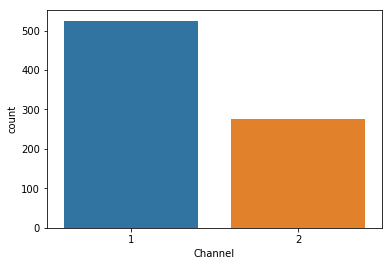

In [189]:
sns.countplot(wholesale_df_pandas["Channel"]);

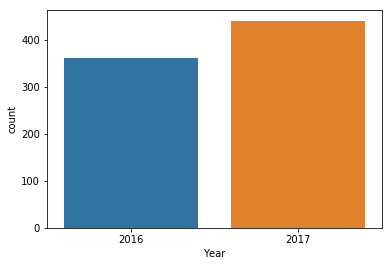

In [379]:
sns.countplot(wholesale_df_pandas["Year"]);

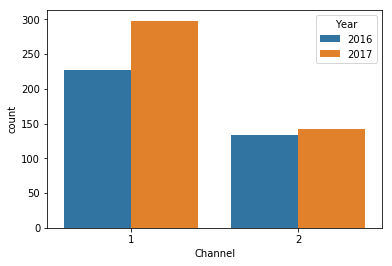

In [381]:
sns.countplot(wholesale_df_pandas["Channel"], hue = wholesale_df_pandas["Year"]);

In [382]:
ch_year = wholesale_df_pandas.groupby(["Channel", "Year"])[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].sum()
ch_year = ch_year.reset_index()

In [383]:
ch_year

,Channel,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,2016,2785164,577088,699663,622573,157995,253374
1,1,2017,4009748,1022472,1178593,1093558,234805,419722
2,2,2016,819162,1021556,1534088,165378,734936,167705
3,2,2017,1223304,1514039,2317845,234671,1032270,230308


In [384]:
ch_year.columns

Index(['Channel', 'Year', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [385]:
ch_year_melt = ch_year.melt(id_vars=['Channel', 'Year'], value_vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

In [386]:
ch_year_melt.head()
ch_year_melt.dtypes

,Channel,Year,variable,value
0,1,2016,Fresh,2785164
1,1,2017,Fresh,4009748
2,2,2016,Fresh,819162
3,2,2017,Fresh,1223304
4,1,2016,Milk,577088


Channel      int64
Year         int64
variable    object
value        int64
dtype: object

In [444]:
# fig = plt.subplots(1, 1, figsize = (10, 5))
# sns.barplot(x = "Channel", y = "value", data = ch_year_melt, hue = "variable", ci=None);

In [445]:
# fig = plt.subplots(1, 1, figsize = (10, 5))
# sns.barplot(x = "Year", y = "value", data = ch_year_melt, hue = "variable", ci=None);

In [446]:
ch_customer = wholesale_df_pandas.groupby(["Channel", "Year", "Customer"])[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].sum()
ch_customer = ch_customer.reset_index()
ch_customer.head()
ch_customer.shape

,Channel,Year,Customer,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,2016,1134744,12891,273,328,1350,28,600
1,1,2016,1136442,10323,563,0,2814,956,101
2,1,2016,1143896,15327,2073,362,2641,22,863
3,1,2016,1176235,36968,4592,4052,7221,1088,147
4,1,2016,1182105,42226,1092,1670,720,720,502


(801, 9)

In [447]:
ch_customer["purchase_all"] = ch_customer[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].sum(axis = 1)
ch_customer.head()
ch_customer["purchase_all"].describe()

,Channel,Year,Customer,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,purchase_all
0,1,2016,1134744,12891,273,328,1350,28,600,15470
1,1,2016,1136442,10323,563,0,2814,956,101,14757
2,1,2016,1143896,15327,2073,362,2641,22,863,21288
3,1,2016,1176235,36968,4592,4052,7221,1088,147,54068
4,1,2016,1182105,42226,1092,1670,720,720,502,46930


count       801.000000
mean      30024.990012
std       24416.679410
min         827.000000
25%       15454.000000
50%       23881.000000
75%       36262.000000
max      199891.000000
Name: purchase_all, dtype: float64

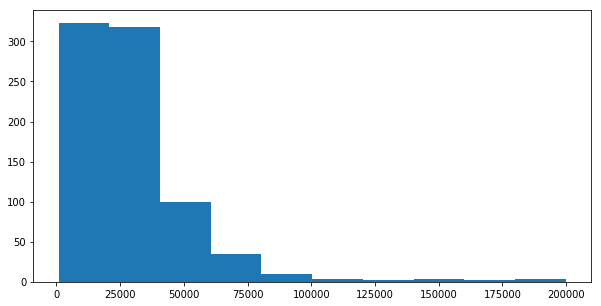

In [448]:
fig = plt.subplots(1,1, figsize = (10, 5))
plt.hist(ch_customer["purchase_all"], bins = 10);

In [449]:
bins = pd.cut(ch_customer['purchase_all'], [0, 37000, 65000, 2000000])
ch_customer_means = ch_customer.groupby(bins)['purchase_all'].agg(['count', 'mean']).reset_index()
ch_customer_means

,purchase_all,count,mean
0,"(0, 37000]",610,20196.219672
1,"(37000, 65000]",141,47799.602837
2,"(65000, 2000000]",50,99811.580000


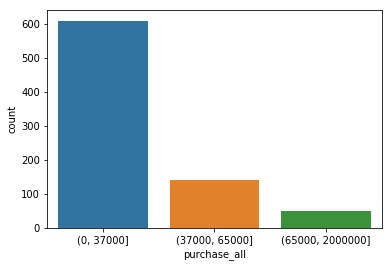

In [450]:
sns.barplot(x = "purchase_all", y = "count", data = ch_customer_means);

The customers can be divided into three different groups based on their purchase. We can focus on the first and second groups and come up with a loyality program to incentivize them to buy more

### Group-I

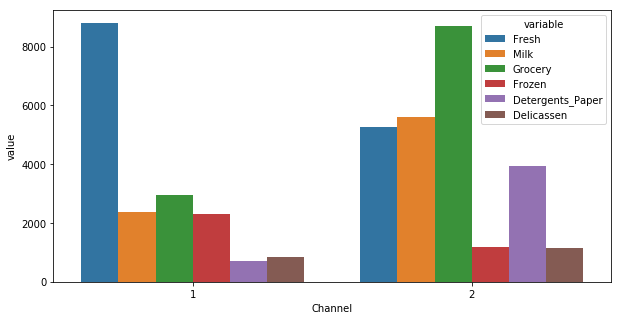

In [459]:
ch_customer_group_1 = ch_customer[ch_customer['purchase_all'] < 37000]
ch_customer_agroup_1_melt = ch_customer_group_1.melt(id_vars=['Channel', 'Customer'], value_vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
fig = plt.subplots(1, 1, figsize = (10, 5))
sns.barplot(x = "Channel", y = "value", data = ch_customer_group_1_melt, hue = "variable", ci=None);

### Group-II

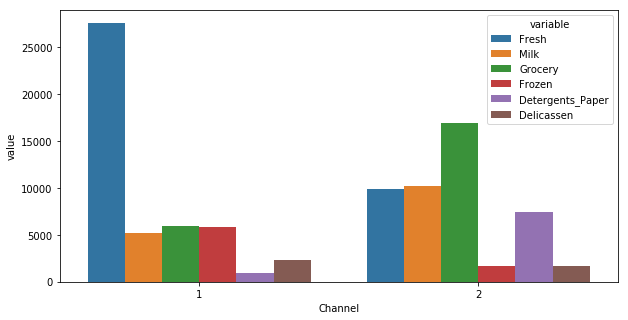

In [452]:
ch_customer_group_2 = ch_customer[(ch_customer['purchase_all'] > 37000) & (ch_customer['purchase_all'] < 65000)]
ch_customer_group_2.head()
ch_customer_group_2_melt = ch_customer_group_2.melt(id_vars=['Channel', 'Customer'], value_vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
fig = plt.subplots(1, 1, figsize = (10, 5))
sns.barplot(x = "Channel", y = "value", data = ch_customer_group_2_melt, hue = "variable", ci=None);

### Group-III

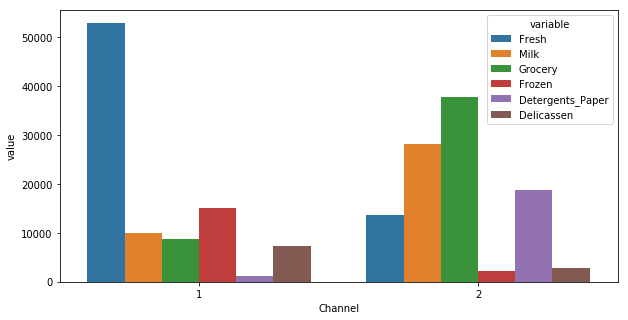

In [453]:
ch_customer_group_3 = ch_customer[ch_customer['purchase_all'] > 65000]
ch_customer_group_3.head()
ch_customer_group_3_melt = ch_customer_group_3.melt(id_vars=['Channel', 'Customer'], value_vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
fig = plt.subplots(1, 1, figsize = (10, 5))
sns.barplot(x = "Channel", y = "value", data = ch_customer_group_3_melt, hue = "variable", ci=None);

## Spark code ##

In [101]:
# wholesale_df = spark.read.csv("wholesale_data.csv", header=True, inferSchema=True)
# wholesale_df.limit(5).toPandas()
# wholesale_df.printSchema()

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,6048141,2017,12669,9656,7561,214,2674,1338
1,2,9336325,2017,7057,9810,9568,1762,3293,1776
2,2,6272942,2017,6353,8808,7684,2405,3516,7844
3,1,7856217,2017,13265,1196,4221,6404,507,1788
4,2,6179511,2017,22615,5410,7198,3915,1777,5185


root
 |-- Channel: integer (nullable = true)
 |-- Customer: integer (nullable = true)
 |-- Year: string (nullable = true)
 |-- Fresh: string (nullable = true)
 |-- Milk: string (nullable = true)
 |-- Grocery: string (nullable = true)
 |-- Frozen: string (nullable = true)
 |-- Detergents_Paper: string (nullable = true)
 |-- Delicassen: string (nullable = true)



In [117]:
# schema = T.StructType([
#     T.StructField("Channel", T.IntegerType(), True),
#     T.StructField("Customer", T.IntegerType(), True),
#     T.StructField("Year", T.IntegerType(), True),
#     T.StructField("Fresh", T.IntegerType(), True),
#     T.StructField("Milk", T.IntegerType(), True),
#     T.StructField("Grocery", T.IntegerType(), True),
#     T.StructField("Frozen", T.IntegerType(), True),
#     T.StructField("Detergents_Paper", T.IntegerType(), True),
#     T.StructField("Delicassen", T.IntegerType(), True)
# ])

In [118]:
# wholesale_df = spark.read.csv("wholesale_data.csv", header=True, schema=schema)
# wholesale_df.show(5)
# wholesale_df.printSchema()

+-------+--------+----+-----+----+-------+------+----------------+----------+
|Channel|Customer|Year|Fresh|Milk|Grocery|Frozen|Detergents_Paper|Delicassen|
+-------+--------+----+-----+----+-------+------+----------------+----------+
|      2| 6048141|2017|12669|9656|   7561|   214|            2674|      1338|
|      2| 9336325|2017| 7057|9810|   9568|  1762|            3293|      1776|
|      2| 6272942|2017| 6353|8808|   7684|  2405|            3516|      7844|
|      1| 7856217|2017|13265|1196|   4221|  6404|             507|      1788|
|      2| 6179511|2017|22615|5410|   7198|  3915|            1777|      5185|
+-------+--------+----+-----+----+-------+------+----------------+----------+
only showing top 5 rows

root
 |-- Channel: integer (nullable = true)
 |-- Customer: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Fresh: integer (nullable = true)
 |-- Milk: integer (nullable = true)
 |-- Grocery: integer (nullable = true)
 |-- Frozen: integer (nullable = tr

In [119]:
# wholesale_df.toPandas().describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,429.0,1.324009e+00,4.685499e-01,1.0,1.0,1.0,2.00,2.0
Customer,429.0,5.364559e+06,2.533776e+06,1134744.0,3347256.0,5286018.0,7309127.00,9990301.0
Year,429.0,2.017000e+03,0.000000e+00,2017.0,2017.0,2017.0,2017.00,2017.0
Fresh,428.0,1.196541e+04,1.271307e+04,3.0,3094.5,8305.0,16850.50,112151.0
Milk,427.0,5.786077e+03,7.315102e+03,55.0,1532.0,3651.0,7196.50,73498.0
Grocery,428.0,8.008551e+03,9.570793e+03,3.0,2156.5,4903.5,10655.75,92780.0
Frozen,427.0,3.075977e+03,4.913830e+03,25.0,744.0,1492.0,3512.50,60869.0
Detergents_Paper,427.0,2.920607e+03,4.817929e+03,3.0,256.5,821.0,3982.00,40827.0
Delicassen,425.0,1.506784e+03,2.769840e+03,3.0,409.0,975.0,1819.00,47943.0


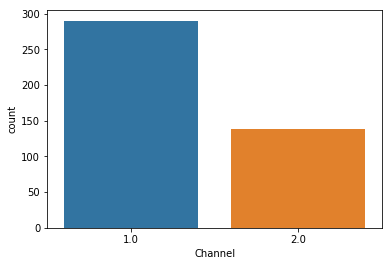

In [59]:
sns.countplot(wholesale_df.toPandas()["Channel"]);

In [34]:
# wholesale_df.createOrReplaceTempView("customer_loyality")

In [61]:
# query = """
#     SELECT Year, COUNT(*)
#     FROM customer_loyality
#     GROUP BY Year
# """
# spark.sql(query).show(6)

+----+--------+
|Year|count(1)|
+----+--------+
|null|     372|
|2017|     429|
+----+--------+



In [51]:
# query = """
#     SELECT COUNT(*) AS channel_2
#     FROM customer_loyality
#     WHERE Channel = 2
# """
# spark.sql(query).show(6)

+---------+
|channel_2|
+---------+
|      139|
+---------+

